<div class="alert alert-block alert-info">
<b></b> 
</div>

# **installing and importing libraries:**
------------------------------------------

## **japanize-matplotlib:**
- **to display games with japanize names when plotting**

In [1]:
pip install japanize-matplotlib

Note: you may need to restart the kernel to use updated packages.


## **imported librares:**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import japanize_matplotlib
import seaborn as sns


<div class="alert alert-block alert-info">
<b></b> 
</div>

# **importing & exploring games.csv**
------------------------------------------

> ## **importing "games.csv"**

<br>

- **Imported it from kaggle**

In [3]:
df = pd.read_csv("/kaggle/input/steam-games-dataset/games.csv")
df.head(2)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


## **data shape**

In [4]:
df.shape

(72934, 39)

## **droping unwanted columns**
------------------------------------------

In [5]:
drops=["Screenshots","Movies","Developers","Publishers","Notes","Metacritic url",
       "Metacritic score","Support url","Header image","Full audio languages","About the game",
       "DLC count","AppID","Score rank","Reviews",'Peak CCU','Tags','Average playtime two weeks',
       'Median playtime forever','Median playtime two weeks']
len(drops)

20

In [6]:
games_data=df.drop(drops,axis=1)
games_data.head(3)

,Name,Release date,Estimated owners,Required age,Price,Supported languages,Website,Support email,Windows,Mac,Linux,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Categories,Genres
0,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,19.99,['English'],http://www.galacticbowling.net,NaN,True,False,False,0,6,11,30,0,0,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports"
1,Train Bandit,"Oct 12, 2017",0 - 20000,0,0.99,"['English', 'French', 'Italian', 'German', 'Sp...",http://trainbandit.com,support@rustymoyher.com,True,True,False,0,53,5,12,0,0,"Single-player,Steam Achievements,Full controll...","Action,Indie"
2,Jolt Project,"Nov 17, 2021",0 - 20000,0,4.99,"['English', 'Portuguese - Brazil']",NaN,ramoncampiaof31@gmail.com,True,False,False,0,0,0,0,0,0,Single-player,"Action,Adventure,Indie,Strategy"


### **available columns after dropping**
- 19 columns

In [7]:
games_data.columns

Index(['Name', 'Release date', 'Estimated owners', 'Required age', 'Price',
       'Supported languages', 'Website', 'Support email', 'Windows', 'Mac',
       'Linux', 'User score', 'Positive', 'Negative', 'Achievements',
       'Recommendations', 'Average playtime forever', 'Categories', 'Genres'],
      dtype='object')

## **exploring & cleaning null data**
------------------------------------------

In [8]:
games_data.isnull().sum()

Name                            2
Release date                    0
Estimated owners                0
Required age                    0
Price                           0
Supported languages             0
Website                     37493
Support email               11338
Windows                         0
Mac                             0
Linux                           0
User score                      0
Positive                        0
Negative                        0
Achievements                    0
Recommendations                 0
Average playtime forever        0
Categories                   3510
Genres                       2533
dtype: int64

### **droping two games without names**

In [9]:
games_data['Name'].dropna();

## **dived data into smaller datasets**
----

## user play time

In [10]:
game_time = games_data[["Name","Average playtime forever"]]
game_time.head(2)

,Name,Average playtime forever
0,Galactic Bowling,0
1,Train Bandit,0


## user recommendation and feedback

In [11]:
game_opinion= games_data[["Name","Recommendations","User score","Positive","Negative","Achievements"]]
game_opinion.head(2)

,Name,Recommendations,User score,Positive,Negative,Achievements
0,Galactic Bowling,0,0,6,11,30
1,Train Bandit,0,0,53,5,12


## **game information:**
- game price
- Estimated owners
- Required age
- Release date

In [12]:
game_info= pd.DataFrame(games_data[['Name', 'Release date', 'Estimated owners', 'Required age','Price']])
game_info.head(2)

,Name,Release date,Estimated owners,Required age,Price
0,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,19.99
1,Train Bandit,"Oct 12, 2017",0 - 20000,0,0.99


### **changing 'Release date' column into just the release year**

In [13]:
games_data['Release date'] = pd.to_datetime(df['Release date']).dt.year

game_info.update(games_data)

In [14]:
game_info.head()

,Name,Release date,Estimated owners,Required age,Price
0,Galactic Bowling,2008,0 - 20000,0,19.99
1,Train Bandit,2017,0 - 20000,0,0.99
2,Jolt Project,2021,0 - 20000,0,4.99
3,Henosis™,2020,0 - 20000,0,5.99
4,Two Weeks in Painland,2020,0 - 20000,0,0.00


### making 'Estimated owners' easer to use later

In [15]:
game_info[['Min Owners', 'Max Owners']] = game_info['Estimated owners'].str.split('-', expand=True)
game_info['Min Owners']= pd.to_numeric(game_info['Min Owners'])
game_info['Max Owners']= pd.to_numeric(game_info['Max Owners'])
game_info['Estimated owners']  =(game_info['Min Owners'] + game_info['Max Owners']) / 2 / 1000000

## game support info

In [16]:
game_support = pd.DataFrame(games_data[['Name','Supported languages', 'Website', 'Support email', 'Windows','Mac', 'Linux']])
game_support.head(2)

,Name,Supported languages,Website,Support email,Windows,Mac,Linux
0,Galactic Bowling,['English'],http://www.galacticbowling.net,NaN,True,False,False
1,Train Bandit,"['English', 'French', 'Italian', 'German', 'Sp...",http://trainbandit.com,support@rustymoyher.com,True,True,False


### transforming "Website"&"Support email" into binary coulunms

In [17]:
game_support["Website"]=game_support["Website"].notnull().astype(int)
game_support["Support email"]=game_support["Support email"].notnull().astype(int)

## **game categories**

In [18]:
game_categories = games_data[['Name','Categories', 'Genres']]
game_categories.head(2)


,Name,Categories,Genres
0,Galactic Bowling,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports"
1,Train Bandit,"Single-player,Steam Achievements,Full controll...","Action,Indie"


In [19]:
#gamees_data['Genres'] = gamees_data['Genres'].str.split(',')
games_data = games_data.explode('Genres')
game_categories.update(games_data)


In [20]:
game_categories.head()

,Name,Categories,Genres
0,Galactic Bowling,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports"
1,Train Bandit,"Single-player,Steam Achievements,Full controll...","Action,Indie"
2,Jolt Project,Single-player,"Action,Adventure,Indie,Strategy"
3,Henosis™,"Single-player,Full controller support","Adventure,Casual,Indie"
4,Two Weeks in Painland,"Single-player,Steam Achievements","Adventure,Indie"


<div class="alert alert-block alert-info">
<b></b> 
</div>

# **analyzing games:**
---
## based on :
- Distribution of Reviews
- release year
- genra
- catagory

<div class="alert alert-block alert-info">
<b></b> 
</div>

> ## **Distribution of Reviews**

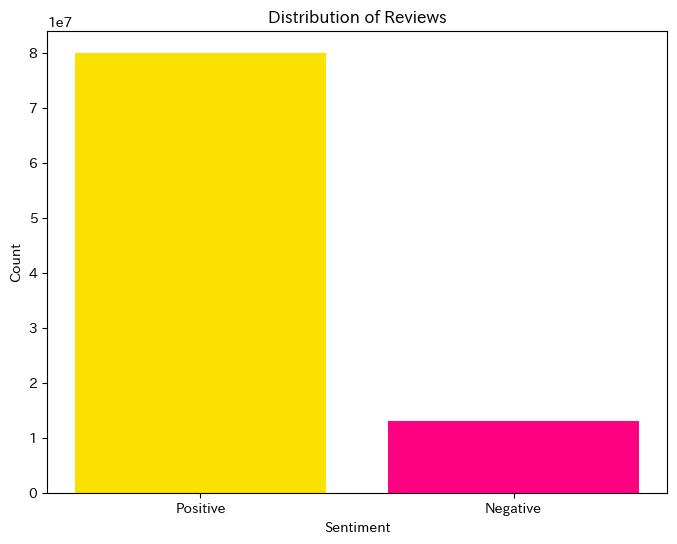

In [21]:
positive_counts = games_data['Positive'].sum()
colors = ['#272727','#FAE100', '#FF0181', '#900DFF',"#32DBF0"]
negative_counts =games_data['Negative'].sum()
# Plot the stacked bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Positive', 'Negative'], [positive_counts, negative_counts],color=colors[1:])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Reviews')
plt.show()

> ## **release year vis.**

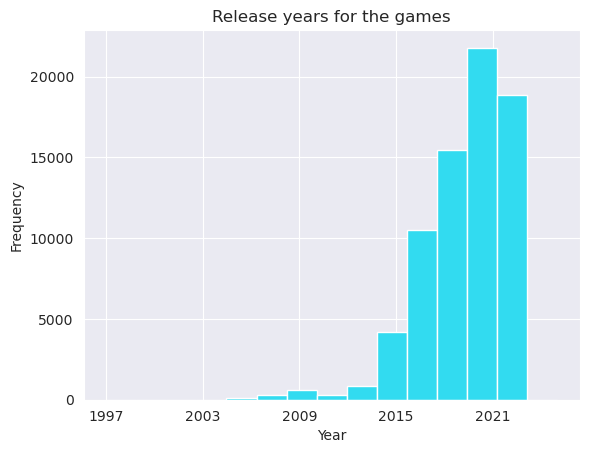

In [58]:

game_info["Release date"].plot.hist(color=colors[-1],bins=15)
plt.xticks(np.arange(min(game_info["Release date"]), max(game_info["Release date"]),6))
plt.xlabel("Year")
plt.title("Release years for the games")
plt.show()

> ## **Genres analysis**

In [23]:
all_g = []
genres =game_categories["Genres"].dropna().values
for g in genres:
    for word in g.split(",") :
        all_g.append(word)


genres_not_unique = pd.DataFrame(all_g , columns=["genres"])
genres_unique_counts = genres_not_unique.groupby(['genres'])['genres'].count()
genres_unique_counts = genres_unique_counts.sort_values(ascending=False)

In [24]:
genres_unique_counts.head(10)

genres
Indie           49568
Casual          29362
Action          29289
Adventure       27092
Simulation      13836
Strategy        13414
RPG             12296
Early Access     8536
Free to Play     5752
Sports           3234
Name: genres, dtype: int64

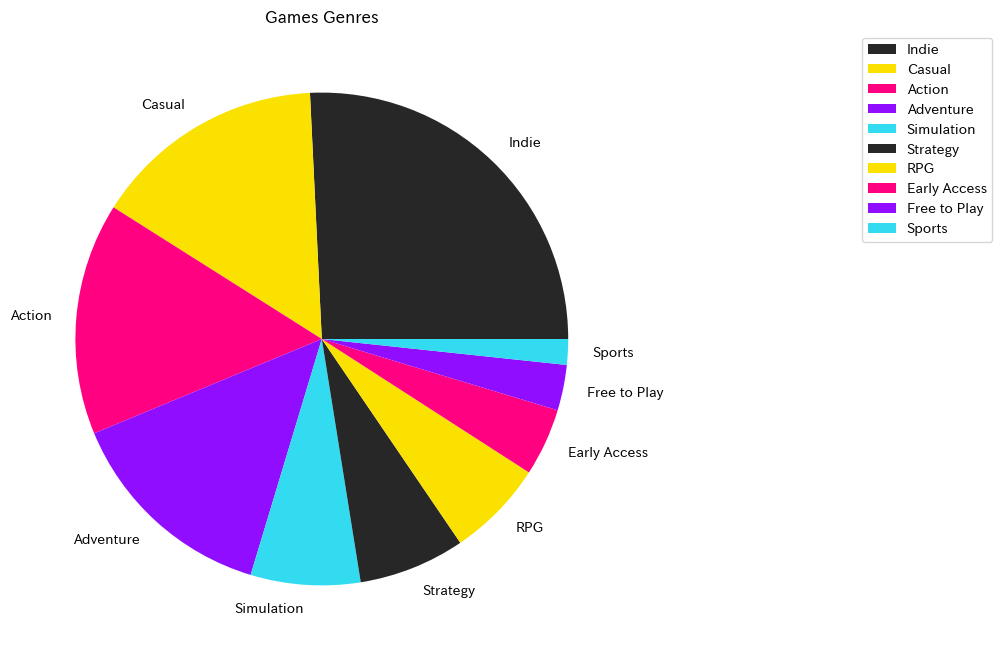

In [25]:
plt.figure(figsize = (15,8))

plt.pie(genres_unique_counts.head(10).values,labels  = genres_unique_counts.head(10).index,colors=colors)
plt.legend(bbox_to_anchor =(1, 0, 0.6, 1))
plt.title("Games Genres")
plt.show()


> ## **categories analysis:**

In [26]:
all_categories = []
catogeries =game_categories["Categories"].dropna().values
for c in catogeries:
    for cate in c.split(",") :
        all_categories.append(cate)


genres_not_unique = pd.DataFrame(all_categories , columns=["Categories"])
genres_unique_counts = genres_not_unique.groupby(['Categories'])['Categories'].count()
genres_unique_counts = genres_unique_counts.sort_values(ascending=False)

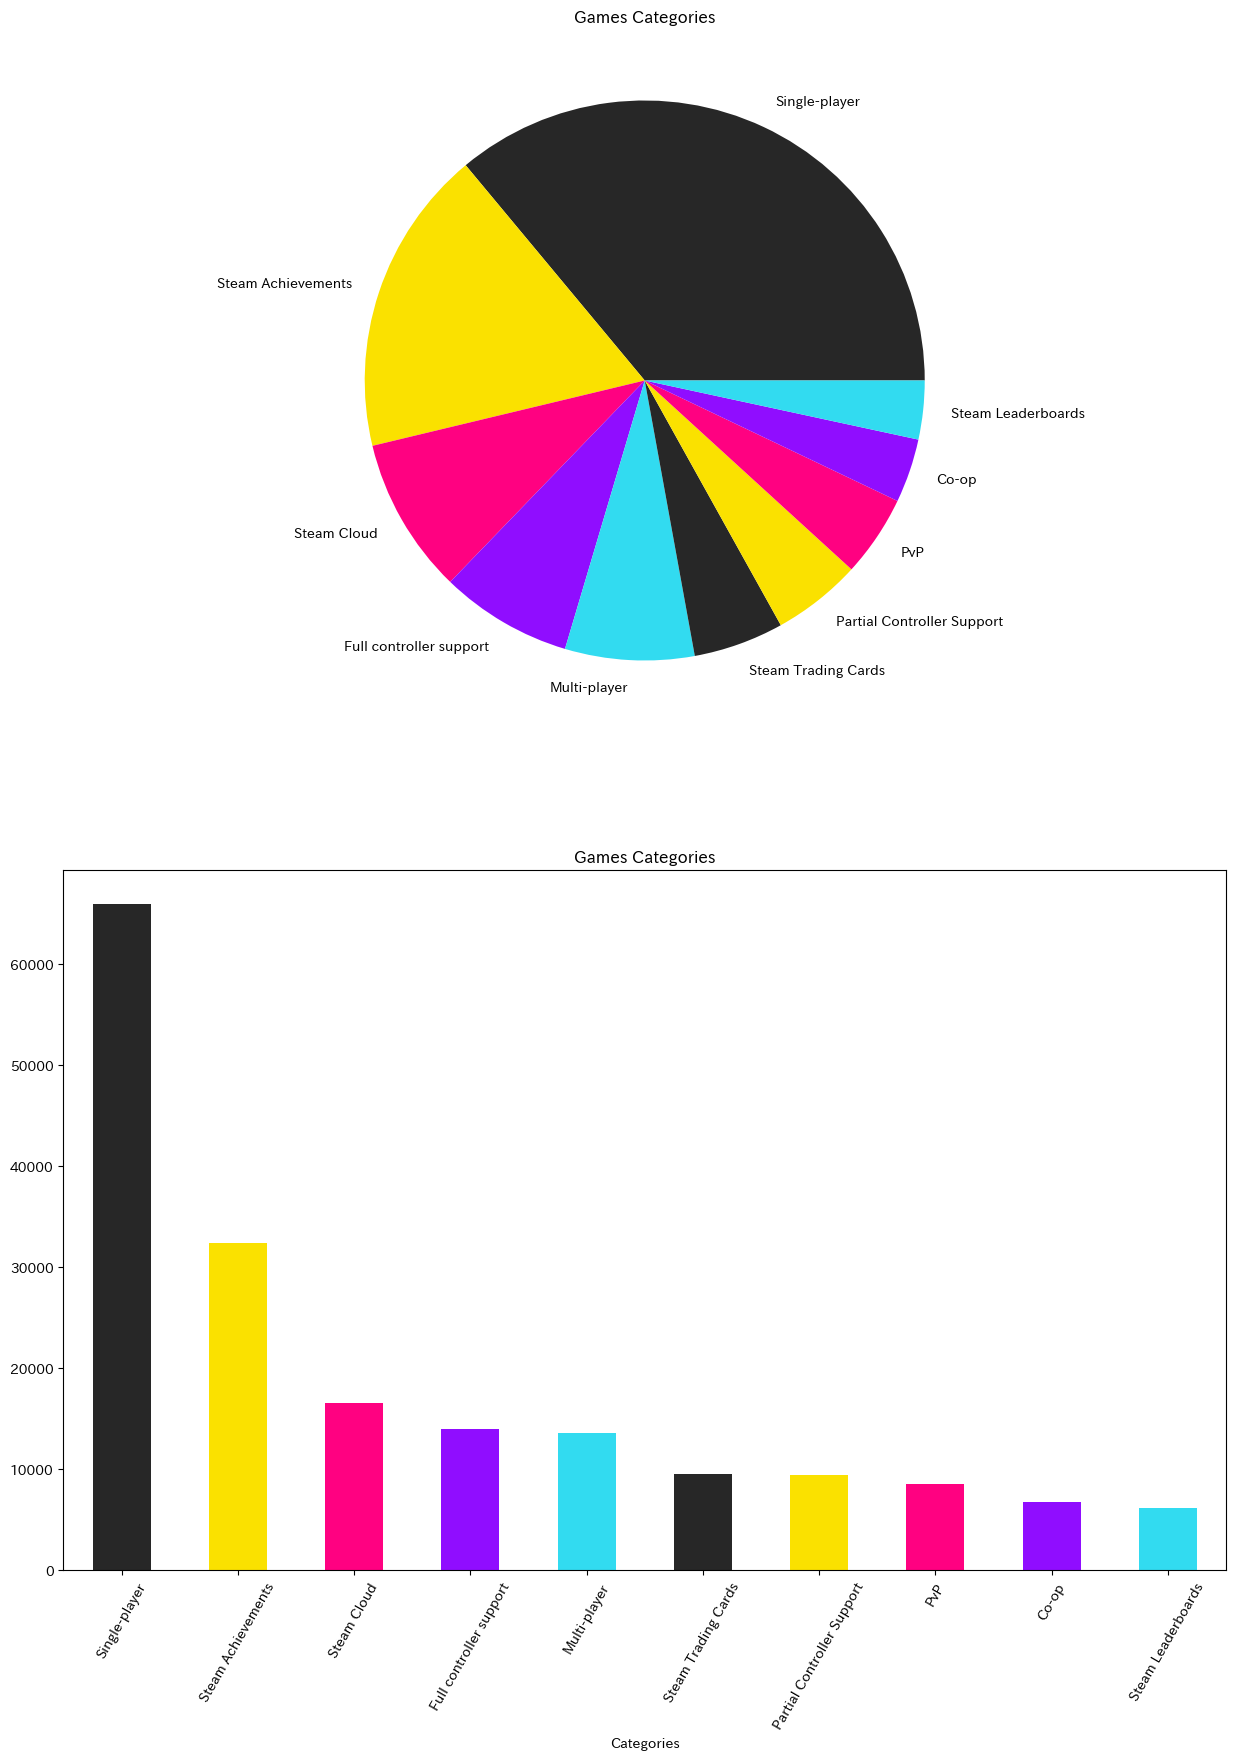

In [27]:
fig=plt.figure(figsize=(15,20))
plt.subplot(2,1,1)

plt.pie(genres_unique_counts.head(10).values,labels  = genres_unique_counts.head(10).index,colors=colors)

plt.title("Games Categories")
plt.subplot(2,1,2)
bar_plot = genres_unique_counts.head(10).plot.bar(color = colors)
plt.title("Games Categories")
plt.xlabel("Categories")
plt.xticks(rotation=60)
plt.show()

<div class="alert alert-block alert-info">
<b></b> </div>

# **understanding what games support for user:**
---
- **if there a website or a support email for the game** 
- **operating system supported**
- **languges supported**



<div class="alert alert-block alert-info">
<b></b> </div>

In [28]:
all_languages = []
langs =game_support["Supported languages"].dropna().values

for g in langs:
    g=g.replace("[","")
    g=g.replace("]","")
    g=g.replace("'","")
    for word in g.split(",") :
        all_languages.append(word)

langs_not_unique = pd.DataFrame(all_languages , columns=["lang"])
langs_unique_counts = langs_not_unique.groupby(['lang'])['lang'].count().sort_values(ascending=False)


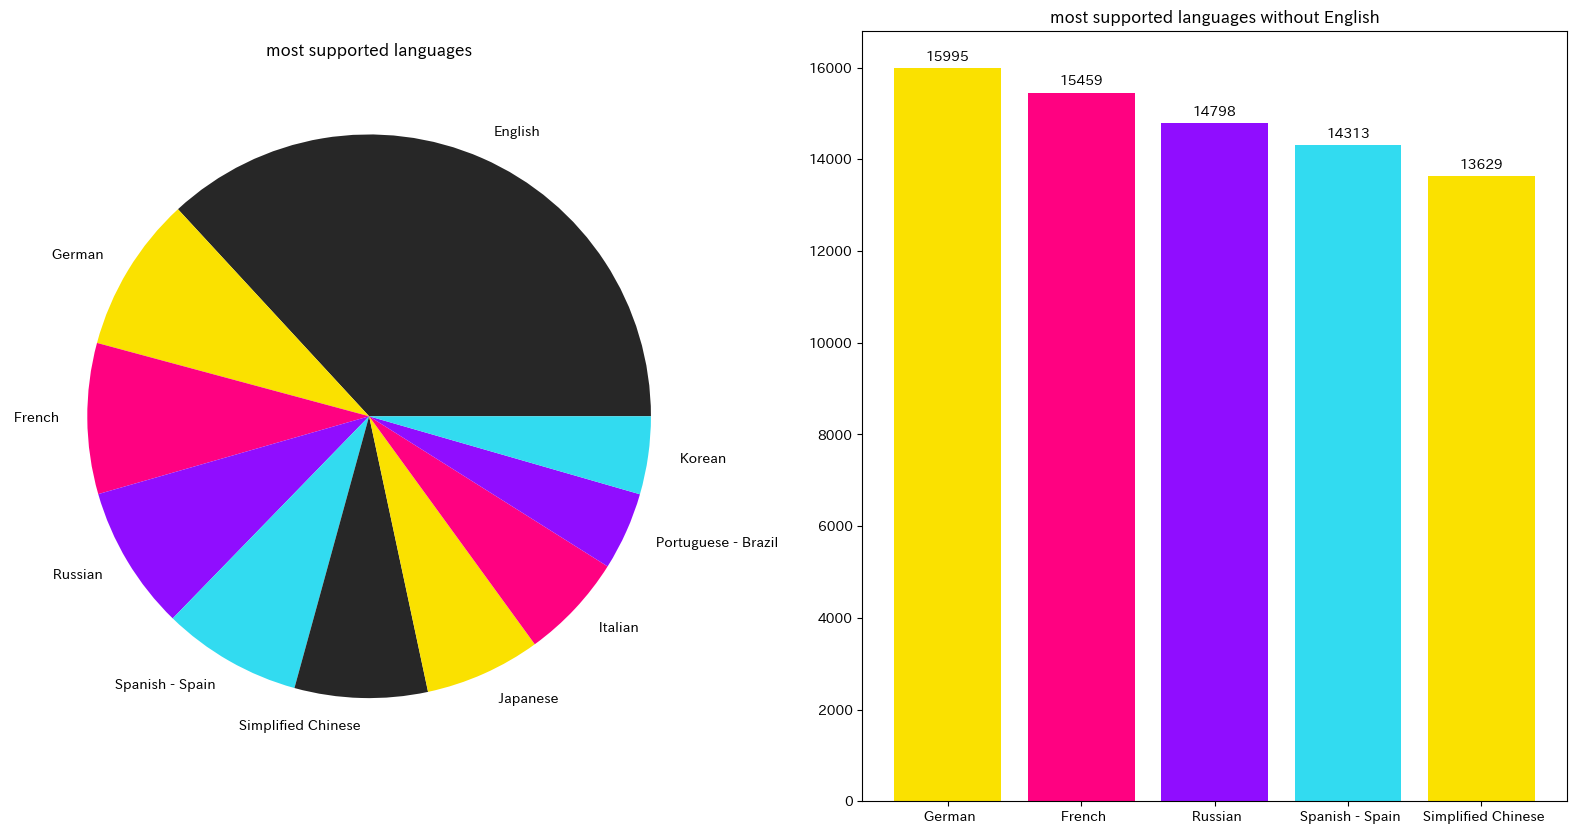

In [29]:
fig=plt.figure(figsize=(20,10))
plt.subplot(1,2,1)

plt.pie(langs_unique_counts.head(10).values,labels  = langs_unique_counts.head(10).index, colors=colors)
plt.title("most supported languages")
plt.subplot(1,2,2)

bar1=plt.bar(langs_unique_counts[1:6].index,langs_unique_counts[1:6].values,color=colors[1:])
plt.bar_label(bar1, labels=langs_unique_counts[1:6].values, padding=3, color='black') ;

plt.title("most supported languages without English")
plt.show()



In [30]:
game_support.head()

,Name,Supported languages,Website,Support email,Windows,Mac,Linux
0,Galactic Bowling,['English'],1,0,True,False,False
1,Train Bandit,"['English', 'French', 'Italian', 'German', 'Sp...",1,1,True,True,False
2,Jolt Project,"['English', 'Portuguese - Brazil']",0,1,True,False,False
3,Henosis™,"['English', 'French', 'Italian', 'German', 'Sp...",1,1,True,True,True
4,Two Weeks in Painland,"['English', 'Spanish - Spain']",1,1,True,True,False


games with support emails 61596
games with Website 35441


Support email    61596
Website          35441
dtype: int64

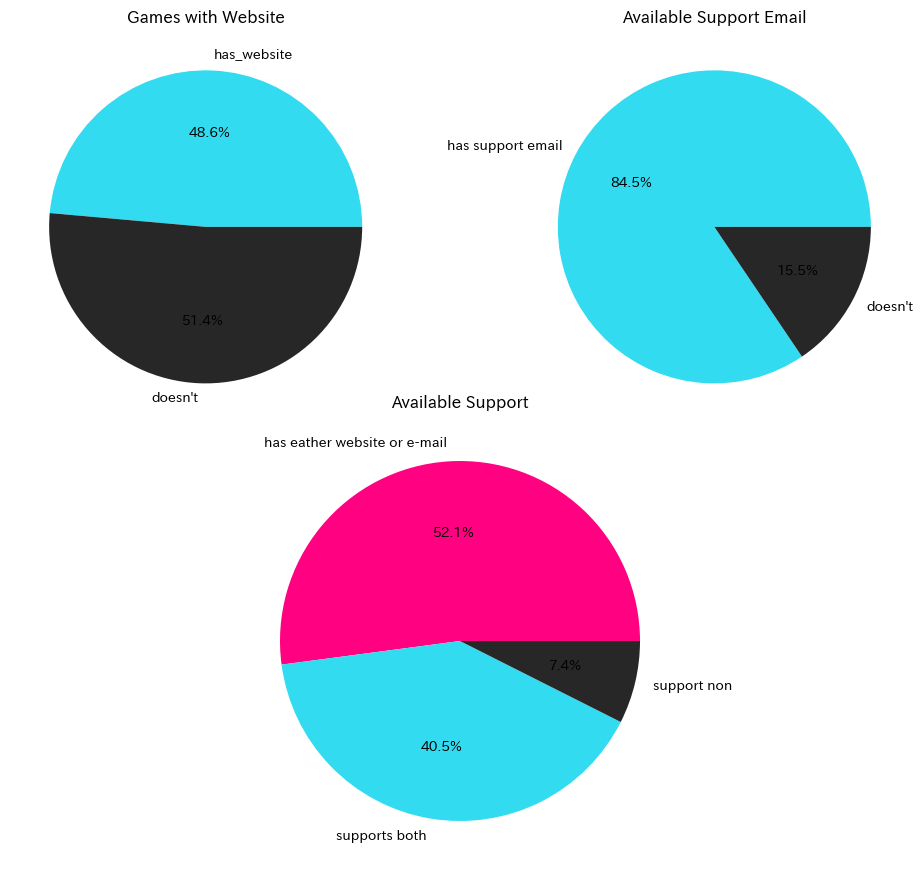

In [31]:
print("games with support emails", game_support["Support email"].sum())
print("games with Website", game_support["Website"].sum())
pie_colors = ['#900DFF', '#FF0181', '#FAE100', '#32DBF0', "#272727"]
supports_email = game_support["Support email"].sum()
has_website = game_support["Website"].sum()
game_support["counting_methods"]=game_support["Website"]+game_support["Support email"]
fig, axs = plt.subplots(2, 2, figsize=(15, 15))


axs[0, 0].pie([has_website, game_support["Website"].count() - has_website],
              labels=["has_website", "doesn't"], autopct='%1.1f%%', colors=pie_colors[3:])
axs[0, 0].set_title("Games with Website")


axs[0, 1].pie([supports_email, game_support["Support email"].count() - supports_email],
              labels=["has support email", "doesn't"], autopct='%1.1f%%', colors=pie_colors[3:])
axs[0, 1].set_title("Available Support Email")


axs[1, 0].pie(game_support["counting_methods"]. value_counts(),
              labels=["has eather website or e-mail", "supports both","support non"], autopct='%1.1f%%', colors=[pie_colors[1],pie_colors[3],pie_colors[4]])
axs[1, 0].set_title("Available Support")

# Remove the empty subplot
axs[1, 1].remove()

plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1, wspace=0.3, hspace=0.3)
axs[1, 0].set_position([0.3, 0.3, 0.4, 0.3])
game_support[["Support email", "Website"]].sum()


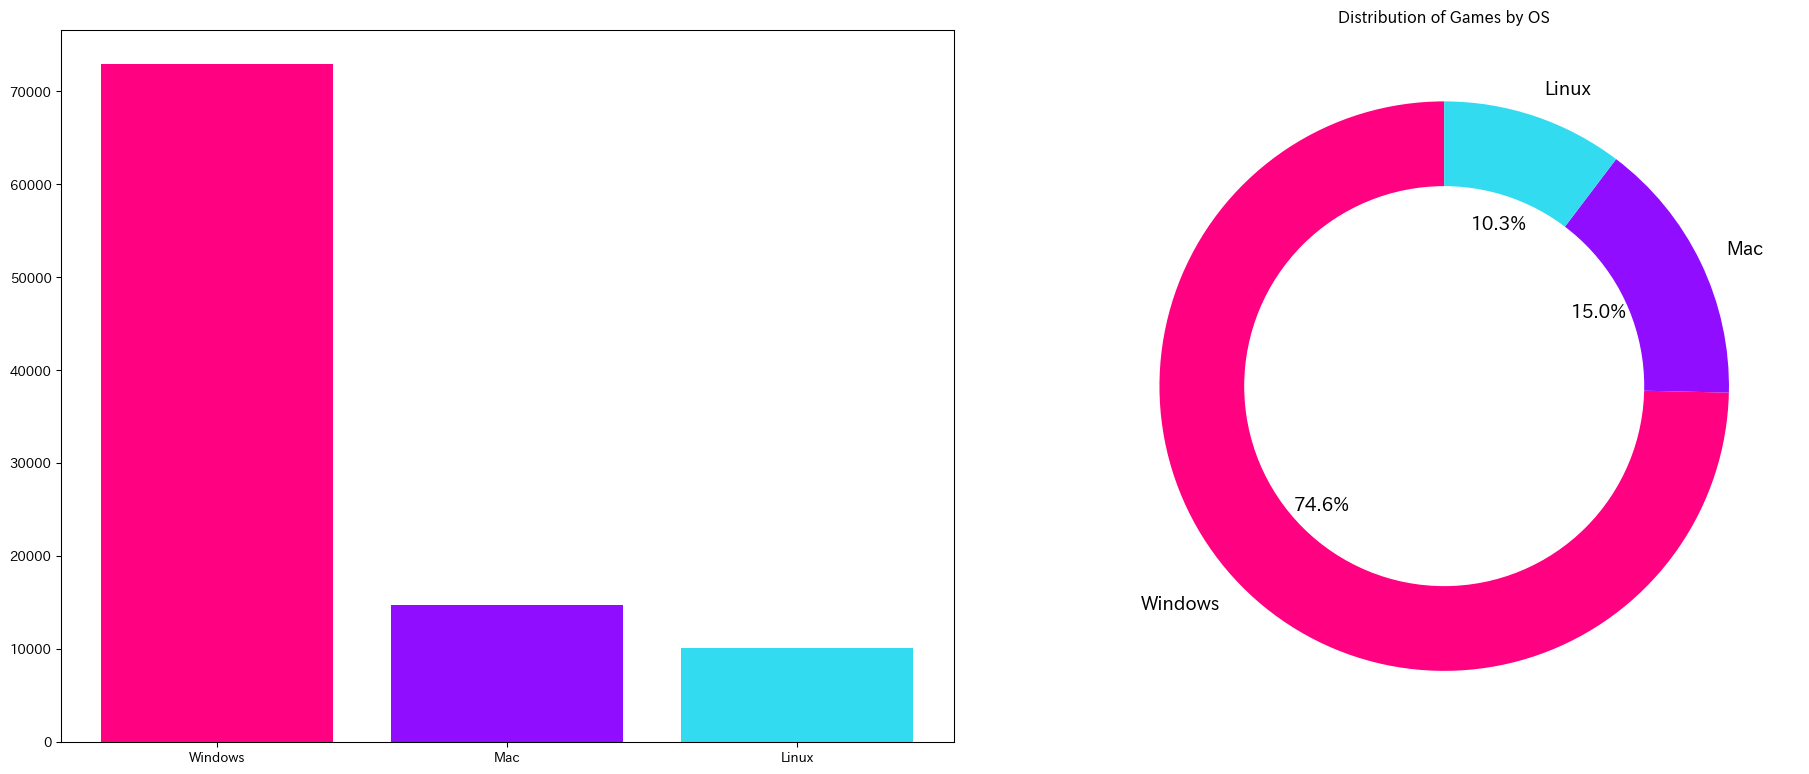

In [32]:
os_game_support=game_support[["Windows","Mac","Linux"]].sum()
vals=game_support[["Windows","Mac","Linux"]].sum().values
fig, ax = plt.subplots(1,2,figsize=(20,8), dpi = 96);

ax[0].bar(os_game_support.index,os_game_support.values,color=colors[2:]);
plt.bar_label(bar1, labels=vals, padding=3, color='black', fontsize=8) ;
plt.tight_layout()

os_counts = [games_data['Windows'].sum(), games_data['Mac'].sum(), games_data['Linux'].sum()]
ax[1].pie(os_counts, labels=['Windows', 'Mac', 'Linux'], autopct='%1.1f%%', startangle=90,colors=colors[2:],textprops={'fontsize': 14} );
ax[1].set_title('Distribution of Games by OS')
ax[1].add_artist(plt.Circle((0, 0), 0.7, color='white'));


<div class="alert alert-block alert-info">
<b></b> </div>

# **relationship between price and games props:**
- **Relationship between price and users count for the game** 
- **seeing Top 10 populated games**
- **Top 10 expensive games**
- **most played games**
- **relationshipbetween langueges supported and price**
- **Distribution of Reviews**
- **Price, User Score, and Achievements**

<div class="alert alert-block alert-info">
<b></b> </div>

In [33]:
game_info["Estimated owners"][game_info["Estimated owners"]<40]

0        0.01
1        0.01
2        0.01
3        0.01
4        0.01
         ... 
72929    0.00
72930    0.00
72931    0.00
72932    0.00
72933    0.00
Name: Estimated owners, Length: 72929, dtype: float64

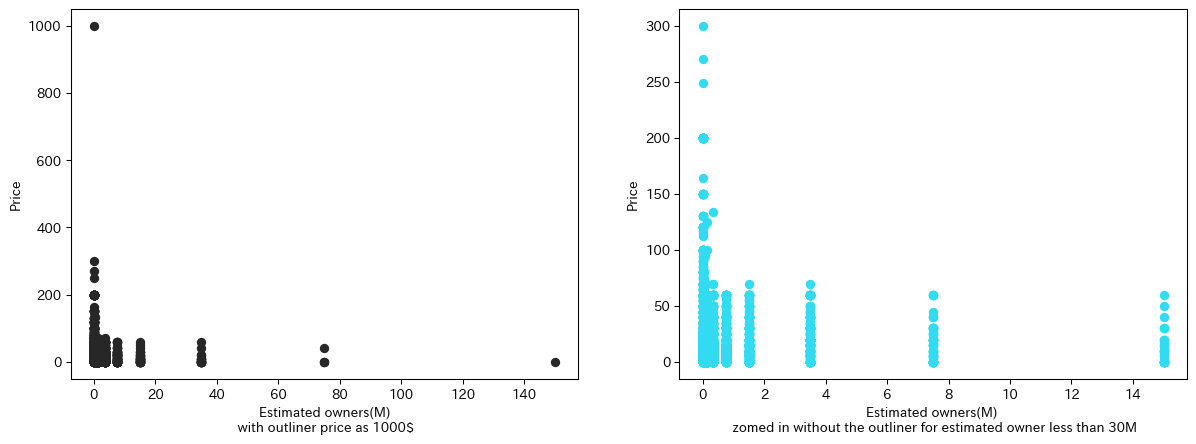

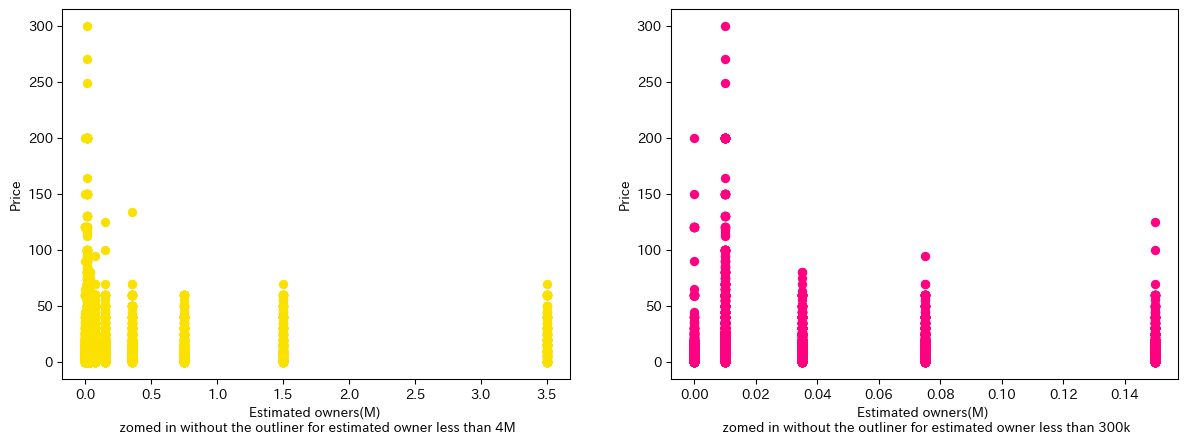

In [34]:
game_info= game_info.reset_index().set_index("Name")
game_info= game_info.sort_values("Estimated owners",ascending=False)
fig, ax = plt.subplots(1,2,figsize=(15,5), dpi = 96)
# colors = ['#272727','#FAE100', '#FF0181', '#900DFF',"#32DBF0"]
ax[0].scatter(game_info['Estimated owners'], game_info['Price'],color='#272727');
ax[0].set_xlabel('Estimated owners(M)\n with outliner price as 1000$')
ax[0].set_ylabel('Price');

ax[1].scatter(game_info['Estimated owners'].drop(game_info[(game_info["index"]==26936)|(game_info["Estimated owners"]>30)].index),
              game_info['Price'].drop(game_info[(game_info["index"]==26936)|(game_info["Estimated owners"]>30)].index),
              color="#32dbf0")
ax[1].set_xlabel('Estimated owners(M) \n zomed in without the outliner for estimated owner less than 30M')
ax[1].set_ylabel('Price');
fig, ax = plt.subplots(1,2,figsize=(15,5), dpi = 96)

ax[0].scatter(game_info['Estimated owners'].drop(game_info[(game_info["index"]==26936)|(game_info["Estimated owners"]>4)].index),
              game_info['Price'].drop(game_info[(game_info["index"]==26936)|(game_info["Estimated owners"]>4)].index),
              color="#FAE100")
ax[0].set_xlabel('Estimated owners(M) \n zomed in without the outliner for estimated owner less than 4M')
ax[0].set_ylabel('Price');

ax[1].scatter(game_info['Estimated owners'].drop(game_info[(game_info["index"]==26936)|(game_info["Estimated owners"]>0.3)].index),
              game_info['Price'].drop(game_info[(game_info["index"]==26936)|(game_info["Estimated owners"]>0.3)].index),
              color="#FF0181")
ax[1].set_xlabel('Estimated owners(M) \n zomed in without the outliner for estimated owner less than 300k')
ax[1].set_ylabel('Price');

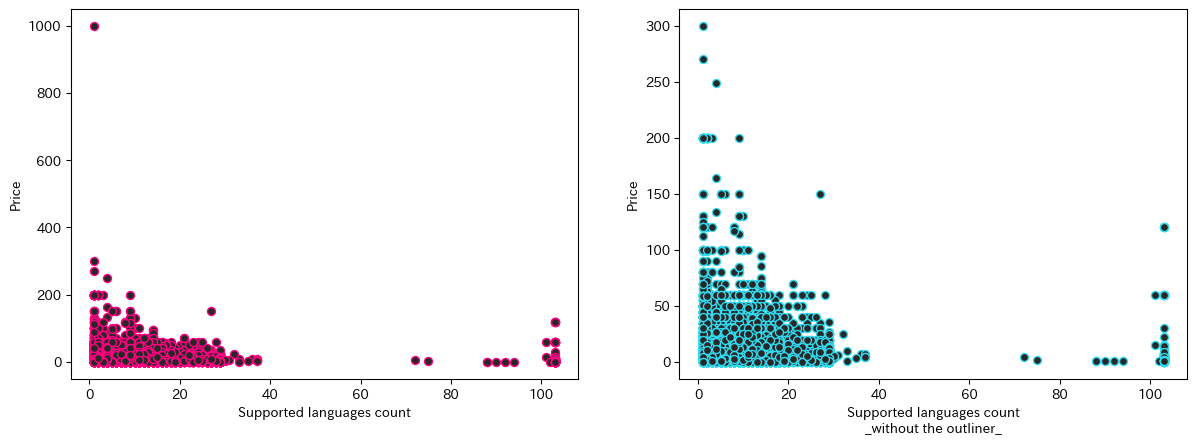

In [35]:
fig, ax = plt.subplots(1,2,figsize=(15,5), dpi = 96)

games_data['Supported languages count'] = games_data['Supported languages'].map(lambda x:x.strip('][').split(', ')).map(lambda i:len(i))
ax[0].scatter(games_data["Supported languages count"], games_data["Price"], color="#272727", edgecolor=colors[2]);
ax[0].set_xlabel('Supported languages count')
ax[0].set_ylabel('Price');

ax[1].scatter(games_data["Supported languages count"].drop(games_data["Price"].argmax()), games_data["Price"].drop(games_data["Price"].argmax()), color=colors[0], edgecolor=colors[4]);
ax[1].set_xlabel('Supported languages count\n_without the outliner_')
ax[1].set_ylabel('Price');

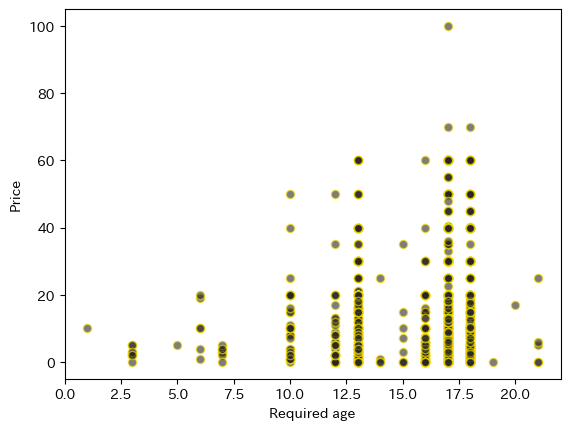

In [36]:
game_delete_zero_age = games_data.copy()
game_delete_zero_age.drop(game_delete_zero_age.loc[game_delete_zero_age['Required age']==0].index, inplace=True)
plt.scatter( game_delete_zero_age['Required age'], game_delete_zero_age["Price"], color=colors[0], edgecolor=colors[1],alpha = 0.6)
plt.xlabel('Required age')
plt.ylabel('Price');

In [37]:
game_delete_zero_age
game_delete_zero_age["Required age"]=pd.to_numeric(game_delete_zero_age["Required age"])
game_delete_zero_age=pd.DataFrame(game_delete_zero_age[(game_delete_zero_age["Required age"]>17)])

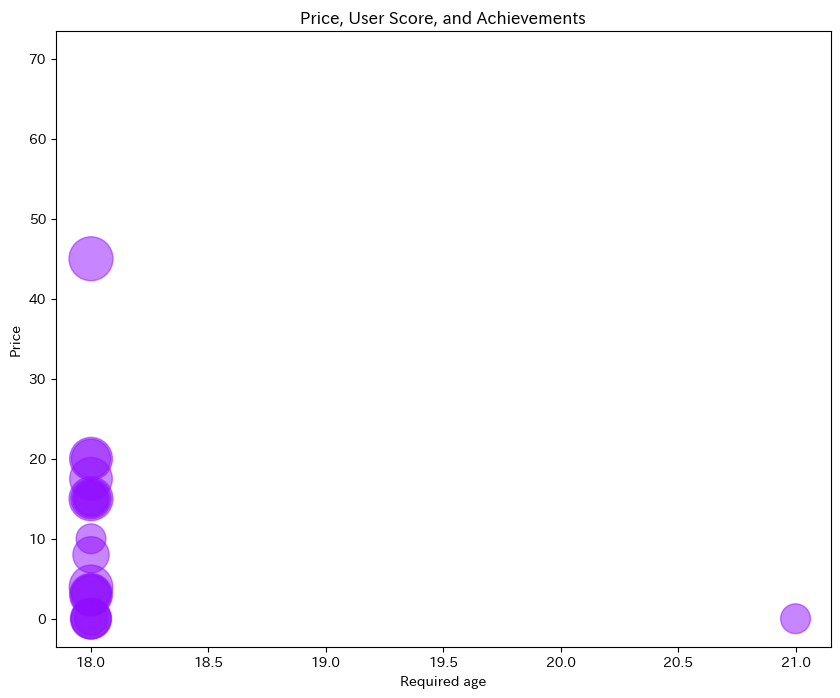

In [38]:
plt.figure(figsize=(10, 8))
plt.scatter(game_delete_zero_age['Required age'],game_delete_zero_age['Price'] , s=game_delete_zero_age['User score']*10, alpha=0.5,color=colors[3])
plt.xlabel('Required age')
plt.ylabel('Price')
plt.title('Price, User Score, and Achievements')
plt.show()

<div class="alert alert-block alert-info">
<b></b> </div>

# **Top10 Games:**
---
- Top 10 populated games
- Top 10 expensive game
- Top 10 played games


<div class="alert alert-block alert-info">
<b></b> </div>

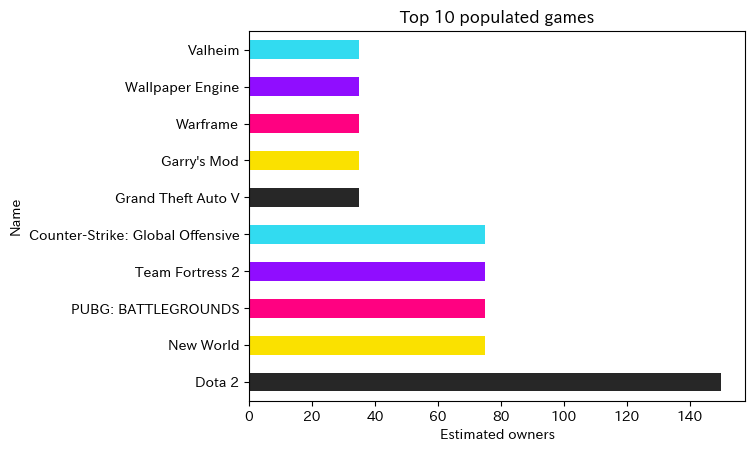

In [39]:
values= game_info[:10]["Estimated owners"]
colormap = plt.cm.tab10(range(0, len(values)))
plt.title("Top 10 populated games")
values.plot.barh(color=colors)
plt.xlabel("Estimated owners");

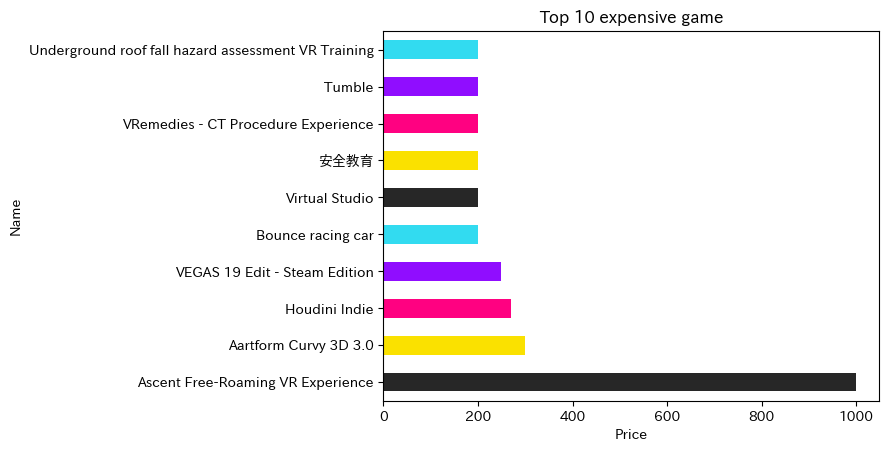

In [40]:

game_info= game_info.sort_values("Price",ascending=False);
values= game_info[:10]["Price"];
colormap = plt.cm.tab10(range(0, len(values)));
plt.title("Top 10 expensive game");
values.plot.barh(color=colors)
plt.xlabel("Price");

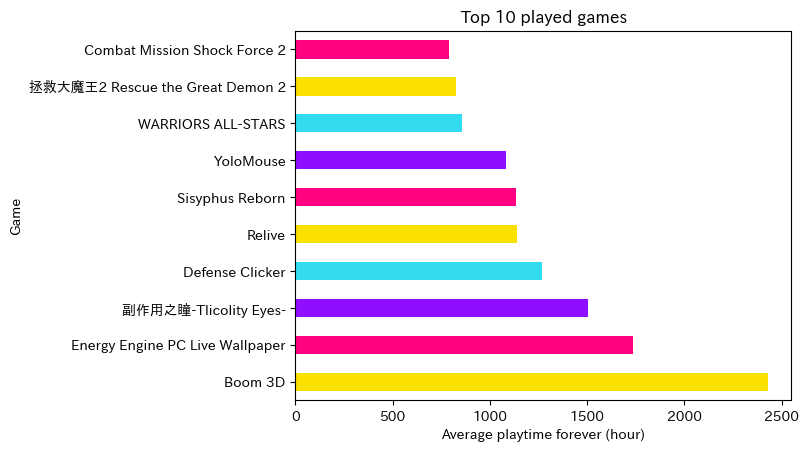

In [41]:
game_time= game_time.reset_index().set_index("Name")
game_time= game_time.sort_values("Average playtime forever",ascending=False);
values= game_time[:10]["Average playtime forever"] /60
colormap = plt.cm.tab10(range(0, len(values)));
plt.title("Top 10 played games");
values.plot.barh(color=colors[1:]);
plt.xlabel("Average playtime forever (hour)");
plt.ylabel("Game");
plt.show()

In [42]:
# game_info[:10]["Price"]


> # **games with the most Positive feedbacks**
---
based on the values in most owners I reaanged them in a descnding order based on the 'Positive' column

In [43]:
game_info= game_info.sort_values("Estimated owners",ascending=False);
values= game_info[:15]


In [44]:
games_data.loc[values["index"],['Name','Positive']].sort_values(by='Positive',ascending=False)

,Name,Positive
46158,Counter-Strike: Global Offensive,5764420
17585,Dota 2,1477153
8885,PUBG: BATTLEGROUNDS,1154655
46416,Terraria,964983
8256,Tom Clancy's Rainbow Six® Siege,929372
30583,Team Fortress 2,823693
1289,Garry's Mod,822326
35001,Rust,703687
39530,Left 4 Dead 2,619457
57459,Wallpaper Engine,522889


> ## **the game in first place**

In [45]:
games_data.iloc[46158,:]

Name                                          Counter-Strike: Global Offensive
Release date                                                              2012
Estimated owners                                          50000000 - 100000000
Required age                                                                 0
Price                                                                      0.0
Supported languages          ['Czech', 'Danish', 'Dutch', 'English', 'Finni...
Website                                        http://blog.counter-strike.net/
Support email                                                              NaN
Windows                                                                   True
Mac                                                                       True
Linux                                                                     True
User score                                                                   0
Positive                                            

<div class="alert alert-block alert-info">
<b></b> </div>

# **Conclusion**
---

<div class="alert alert-block alert-info">
<b></b> </div>

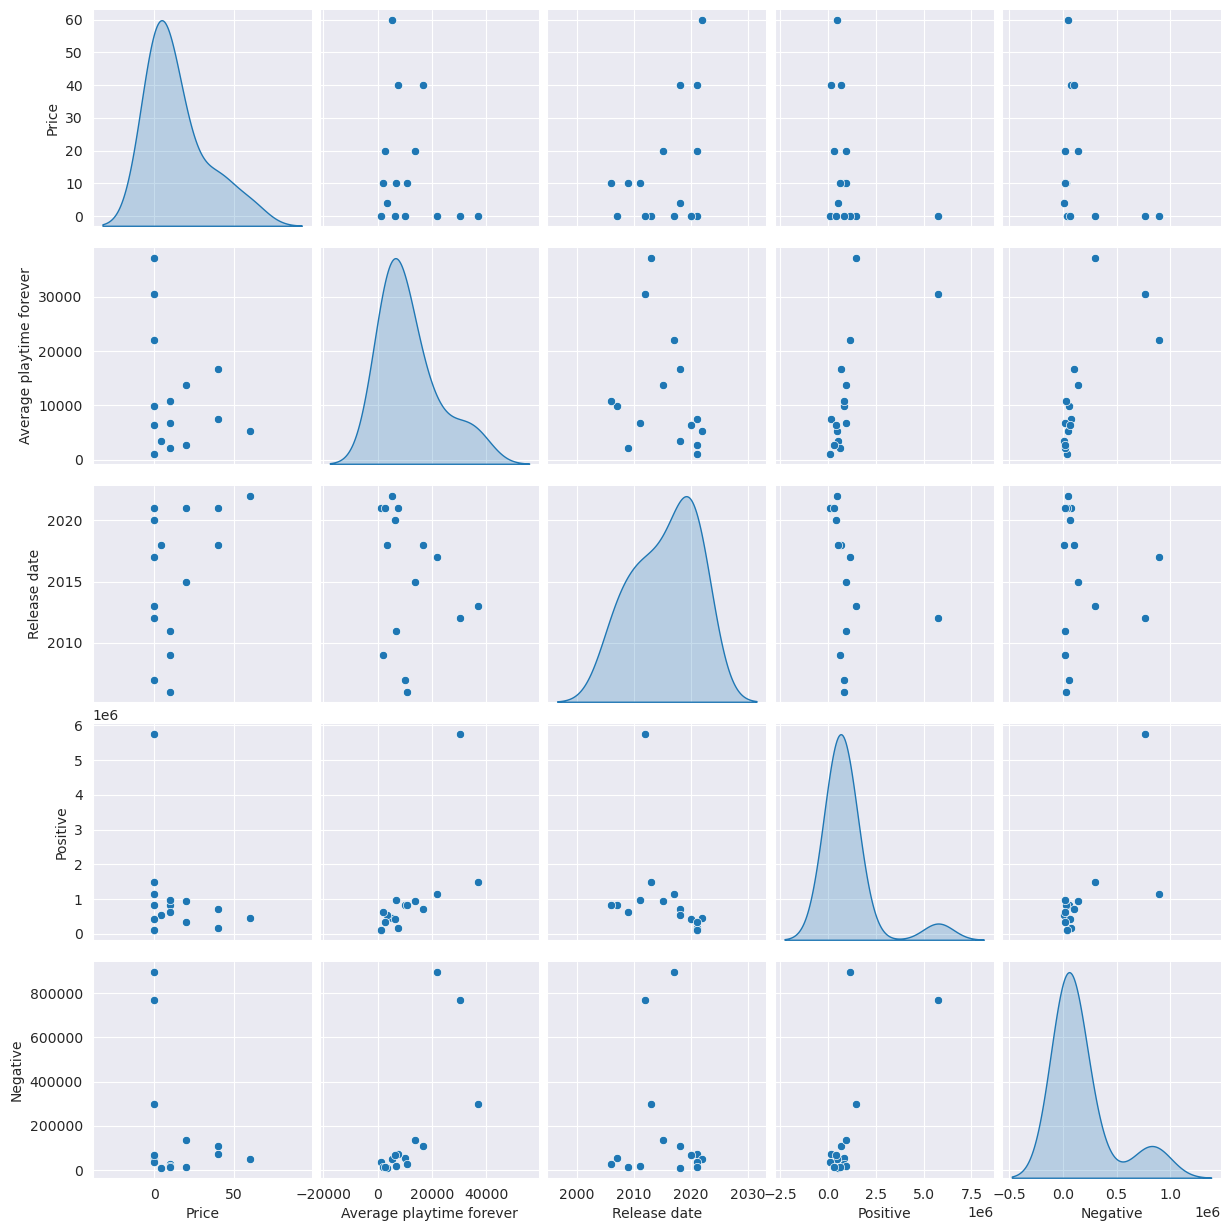

In [46]:
sns.set_style('darkgrid')
g = sns.pairplot(games_data.loc[values["index"],["Price","Average playtime forever","Release date",'Positive','Negative']], diag_kind='kde')
plt.show()

> - game industry has evolved due to covid-19 pandamic where compunies produced more games between the year [2019 and 2021]
- positive reviews on steam platform is much more than the Negative ones witch means that most of the games are user friendly

- the most used games genres are:
    - indie
    - casual
    - Action 
    


> - # most used categories:
    - single-player
    - steam acheavments
    - steam clouad